In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import eda_helper_functions


In [4]:
file_path = "/Users/mukulagarwal/Desktop/Python_Code/flights_sagemaker_project/Data/train.csv"
train = pd.read_csv(file_path)

train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-12-03,Banglore,New Delhi,08:55:00,21:20:00,745,1.0,No Info,13817
1,Indigo,2019-03-06,Mumbai,Hyderabad,01:40:00,03:10:00,90,0.0,No Info,2754
2,Jet Airways,2019-09-05,Kolkata,Banglore,20:00:00,04:40:00,520,1.0,In-flight meal not included,8586
3,Multiple Carriers,2019-05-27,Delhi,Cochin,11:30:00,19:15:00,465,1.0,No Info,15898
4,Indigo,2019-03-18,Chennai,Kolkata,07:55:00,10:15:00,140,0.0,No Info,3850


In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

Observation
We observe that data types of ceratain columns like `date of journey`,`dep_time`,`arrival_time` are not what they should be. They are object data types while they should be datatime64[ns] type

In [10]:
train_data = train.assign(
    **{
        col: pd.to_datetime(train.loc[:,col])
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)

In [14]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


Observation
Here we observe that we have successfully changed the datatype of our columns are our dataset now has 1 record that has null values at total_stops

In [17]:
train.describe(include = 'number')

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,617.992188,0.784038,8989.454687
std,499.430184,0.643508,4355.926699
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5293.750000
50%,480.000000,1.000000,8371.500000
75%,908.750000,1.000000,12375.750000
max,2295.000000,3.000000,31825.000000


In [20]:
train.assign(total_stops = train['total_stops'].astype(object)).describe(include = "O")

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,236,266,266,351.0,487


### Checking for Outliers

In [21]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(n_estimators = 10,random_state = 42)

### Checking for Null values

In [23]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [25]:
train.loc[train['total_stops'].isna()]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
177,Air India,2019-06-05,Delhi,Cochin,2024-08-28 09:45:00,2024-08-28 09:25:00,1420,NaN,No Info,7480


In [27]:
train = train.drop(index =[177])

In [28]:
(
    train.assign(outlier = forest.fit_predict(train
        .drop(columns="price")
        .select_dtypes(include="number")))
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-12-03,Banglore,New Delhi,2024-08-28 08:55:00,2024-08-28 21:20:00,745,1.0,No Info,13817,1
1,Indigo,2019-03-06,Mumbai,Hyderabad,2024-08-28 01:40:00,2024-08-28 03:10:00,90,0.0,No Info,2754,-1
2,Jet Airways,2019-09-05,Kolkata,Banglore,2024-08-28 20:00:00,2024-08-28 04:40:00,520,1.0,In-flight meal not included,8586,1
3,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-08-28 11:30:00,2024-08-28 19:15:00,465,1.0,No Info,15898,1
4,Indigo,2019-03-18,Chennai,Kolkata,2024-08-28 07:55:00,2024-08-28 10:15:00,140,0.0,No Info,3850,1
...,...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-06-06,Kolkata,Banglore,2024-08-28 08:20:00,2024-08-28 21:50:00,810,2.0,No Info,10697,-1
636,Air India,2019-09-06,Delhi,Cochin,2024-08-28 09:45:00,2024-08-28 23:00:00,795,1.0,No Info,8907,1
637,Jet Airways,2019-06-24,Delhi,Cochin,2024-08-28 02:15:00,2024-08-28 04:25:00,1570,1.0,In-flight meal not included,10262,-1
638,Jet Airways,2019-05-21,Delhi,Cochin,2024-08-28 13:00:00,2024-08-28 04:25:00,925,1.0,In-flight meal not included,12898,1


In [33]:
# -1 if outlier
# +1 if not outlier

(
    train.assign(outlier = forest.fit_predict(train
        .drop(columns="price")
        .select_dtypes(include="number")))
        .query("outlier == -1")
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Indigo,2019-03-06,Mumbai,Hyderabad,2024-08-28 01:40:00,2024-08-28 03:10:00,90,0.0,No Info,2754,-1
7,Jet Airways,2019-09-03,Delhi,Cochin,2024-08-28 05:25:00,2024-08-28 04:25:00,1380,2.0,No Info,16914,-1
10,Multiple Carriers,2019-03-27,Delhi,Cochin,2024-08-28 07:05:00,2024-08-28 21:20:00,855,2.0,No Info,6128,-1
12,Jet Airways,2019-03-05,Banglore,Delhi,2024-08-28 18:55:00,2024-08-28 22:00:00,185,0.0,In-flight meal not included,6144,-1
14,Vistara,2019-06-05,Banglore,Delhi,2024-08-28 07:00:00,2024-08-28 09:40:00,160,0.0,No Info,4668,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-03-18,Chennai,Kolkata,2024-08-28 08:20:00,2024-08-28 10:35:00,135,0.0,No Info,3859,-1
628,Air India,2019-06-06,Kolkata,Banglore,2024-08-28 14:30:00,2024-08-28 23:15:00,525,2.0,No Info,15894,-1
632,Indigo,2019-06-15,Banglore,Delhi,2024-08-28 21:15:00,2024-08-28 00:15:00,180,0.0,No Info,3943,-1
635,Air India,2019-06-06,Kolkata,Banglore,2024-08-28 08:20:00,2024-08-28 21:50:00,810,2.0,No Info,10697,-1


In [36]:
(
    train.assign(outlier = forest.fit_predict(train
        .drop(columns="price")
        .select_dtypes(include="number")))
        .query("outlier == -1")
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Indigo,2019-03-06,Mumbai,Hyderabad,2024-08-28 01:40:00,2024-08-28 03:10:00,90,0.0,No Info,2754,-1
7,Jet Airways,2019-09-03,Delhi,Cochin,2024-08-28 05:25:00,2024-08-28 04:25:00,1380,2.0,No Info,16914,-1
10,Multiple Carriers,2019-03-27,Delhi,Cochin,2024-08-28 07:05:00,2024-08-28 21:20:00,855,2.0,No Info,6128,-1
12,Jet Airways,2019-03-05,Banglore,Delhi,2024-08-28 18:55:00,2024-08-28 22:00:00,185,0.0,In-flight meal not included,6144,-1
14,Vistara,2019-06-05,Banglore,Delhi,2024-08-28 07:00:00,2024-08-28 09:40:00,160,0.0,No Info,4668,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-03-18,Chennai,Kolkata,2024-08-28 08:20:00,2024-08-28 10:35:00,135,0.0,No Info,3859,-1
628,Air India,2019-06-06,Kolkata,Banglore,2024-08-28 14:30:00,2024-08-28 23:15:00,525,2.0,No Info,15894,-1
632,Indigo,2019-06-15,Banglore,Delhi,2024-08-28 21:15:00,2024-08-28 00:15:00,180,0.0,No Info,3943,-1
635,Air India,2019-06-06,Kolkata,Banglore,2024-08-28 08:20:00,2024-08-28 21:50:00,810,2.0,No Info,10697,-1


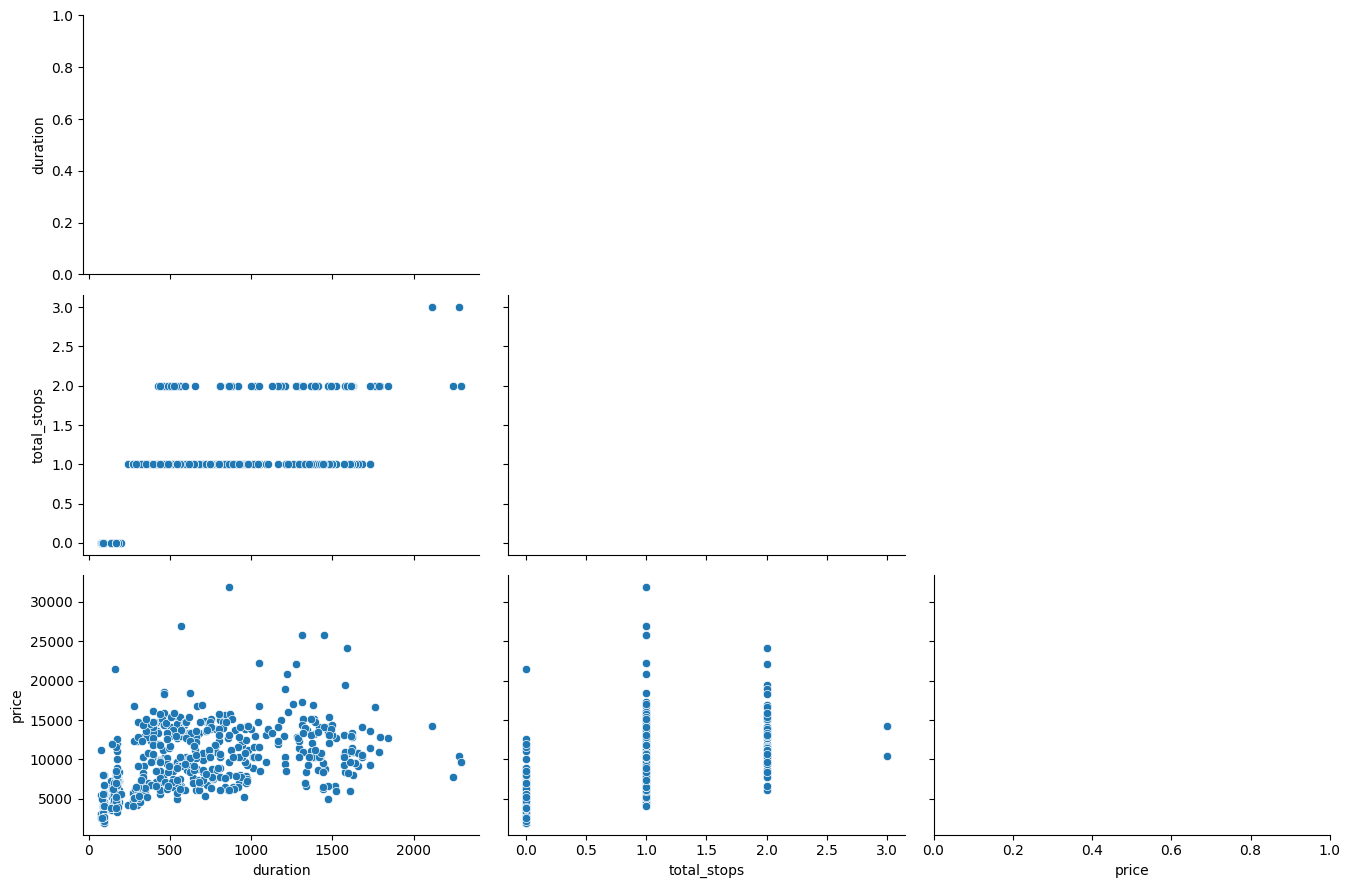

In [30]:
eda_helper_functions.pair_plots(train)

Observations
-  We see that price of flights and duration of flights have a linear relationship with each other
-  We see that average price of flight with 1 or 2 stops is similar but is greater than average price of flights with 0 stops. Similar sort of relationship is observed for duration and total_stops

### Correlation Matrix (Numeric Features)

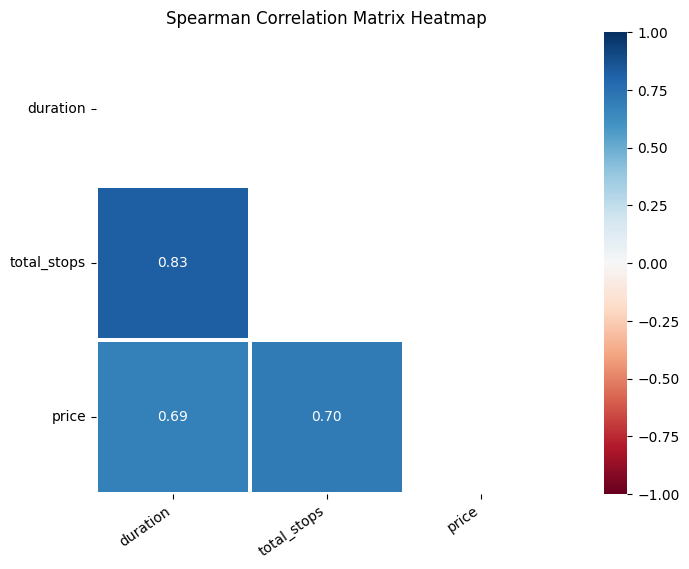

In [31]:
eda_helper_functions.correlation_heatmap(train)

We see that duration and total stops are highly correlated with each other. We can dropping one of them in our featuring engg process

### Cramers correlation (Categorical Features)

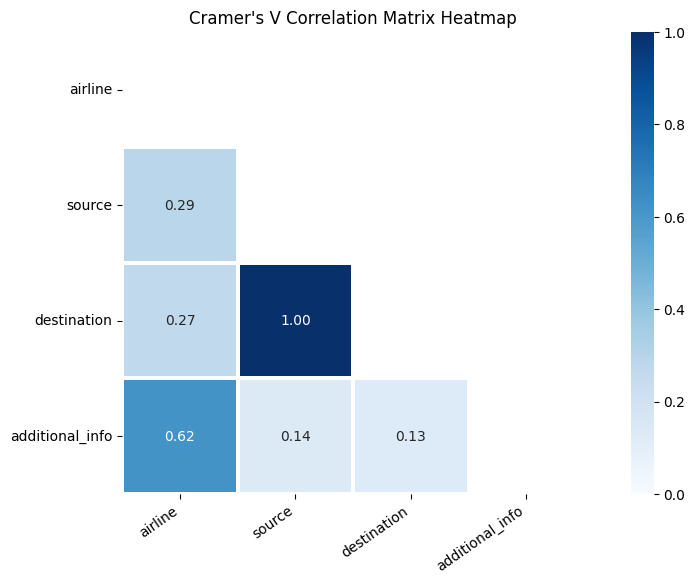

In [32]:
eda_helper_functions.cramersV_heatmap(train)

Observation
- Airline and Additional_Info seems to have a high correlation with each other

In [37]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## Detailed Analysis

In [38]:
train['airline']

0            Jet Airways
1                 Indigo
2            Jet Airways
3      Multiple Carriers
4                 Indigo
             ...        
635            Air India
636            Air India
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 639, dtype: object

In [39]:
eda_helper_functions.cat_summary(train,'airline')

0            Jet Airways
1                 Indigo
2            Jet Airways
3      Multiple Carriers
4                 Indigo
             ...        
635            Air India
636            Air India
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 639, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 639 / 639 rows


,
count,639
unique,8
top,Jet Airways
freq,236


,count,percentage
category,,
Jet Airways,236,0.369327
Indigo,125,0.195618
Air India,94,0.147105
Multiple Carriers,73,0.114241
Spicejet,55,0.086072
Vistara,26,0.040689
Goair,16,0.025039
Air Asia,14,0.021909


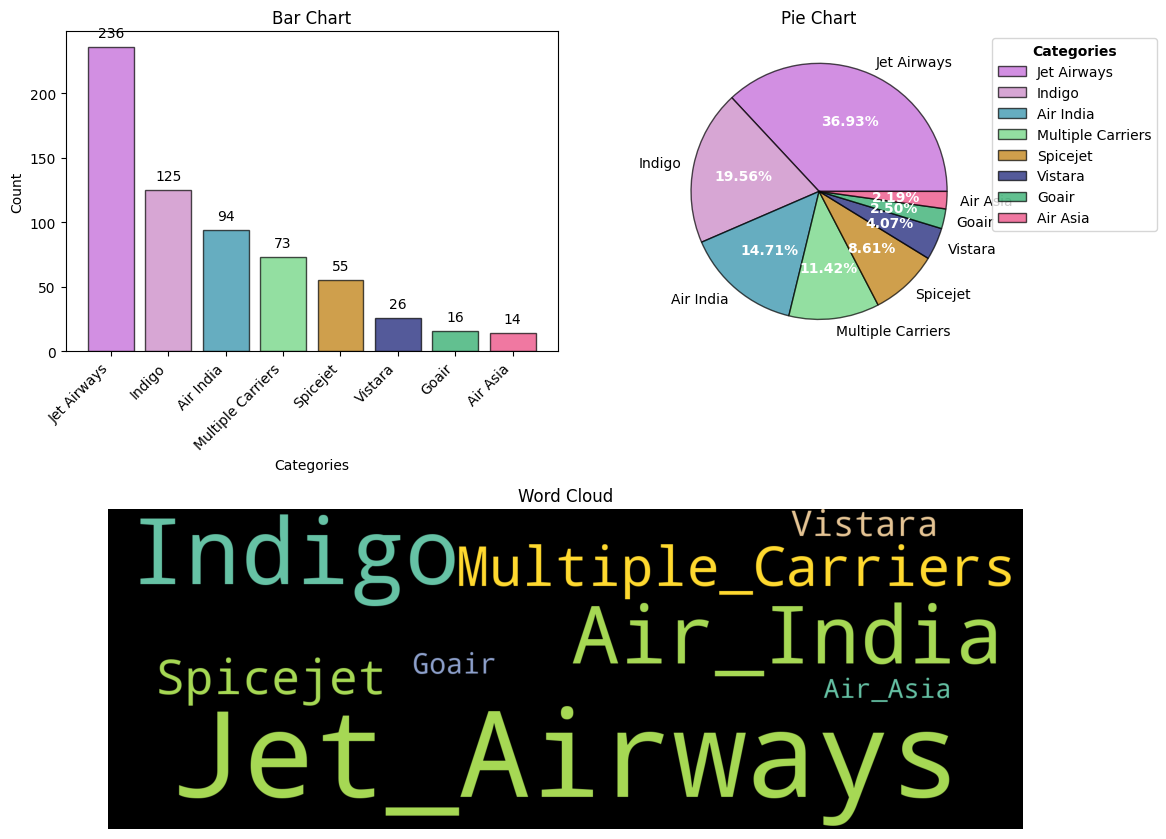

In [40]:
eda_helper_functions.cat_univar_plots(train,"airline")

Observations: 
- Here we see that for this categorical variable we see that we can group our value for last 4 categories in one as other
- The last 4 categories will combine together to form approx 16% of data

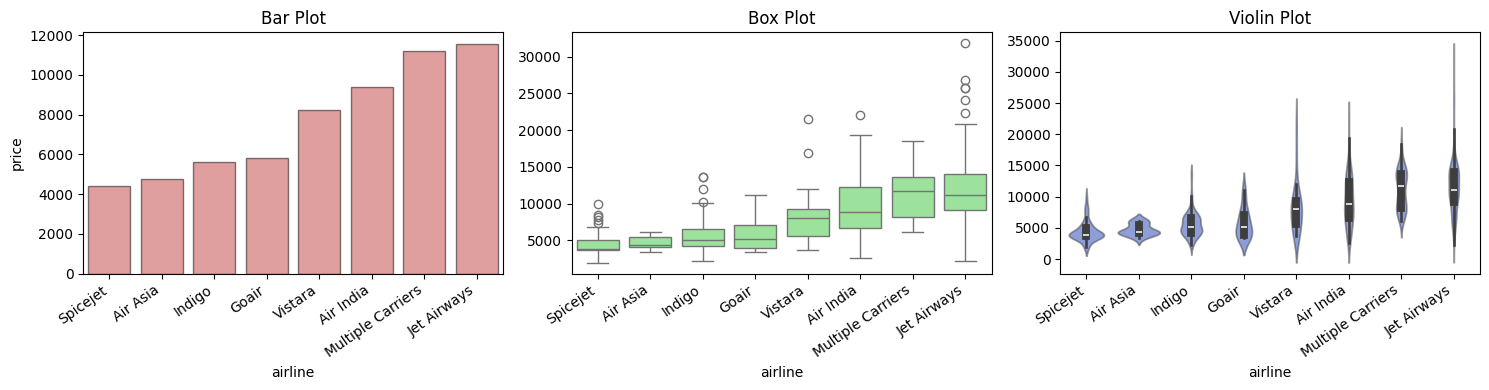

In [81]:
eda_helper_functions.num_cat_bivar_plots(train,"price","airline")

Observation
- Average price is different for different prices. Based on airline prices are varying
- From Box plot we see the distribution of prices for each airline, here we also observe potential outliers
- So far from this we can conclude that `airline` has strong relationship with our target feature `price`  

In [42]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 61.94971548718423
- p-value              : 1.2232247868849953e-67
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 306.8615245268394
- p-value              : 2.070900059160779e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


Observation:
- The Hypothesis testing confirms our observation and indeed price and airline are highly correlated to each other

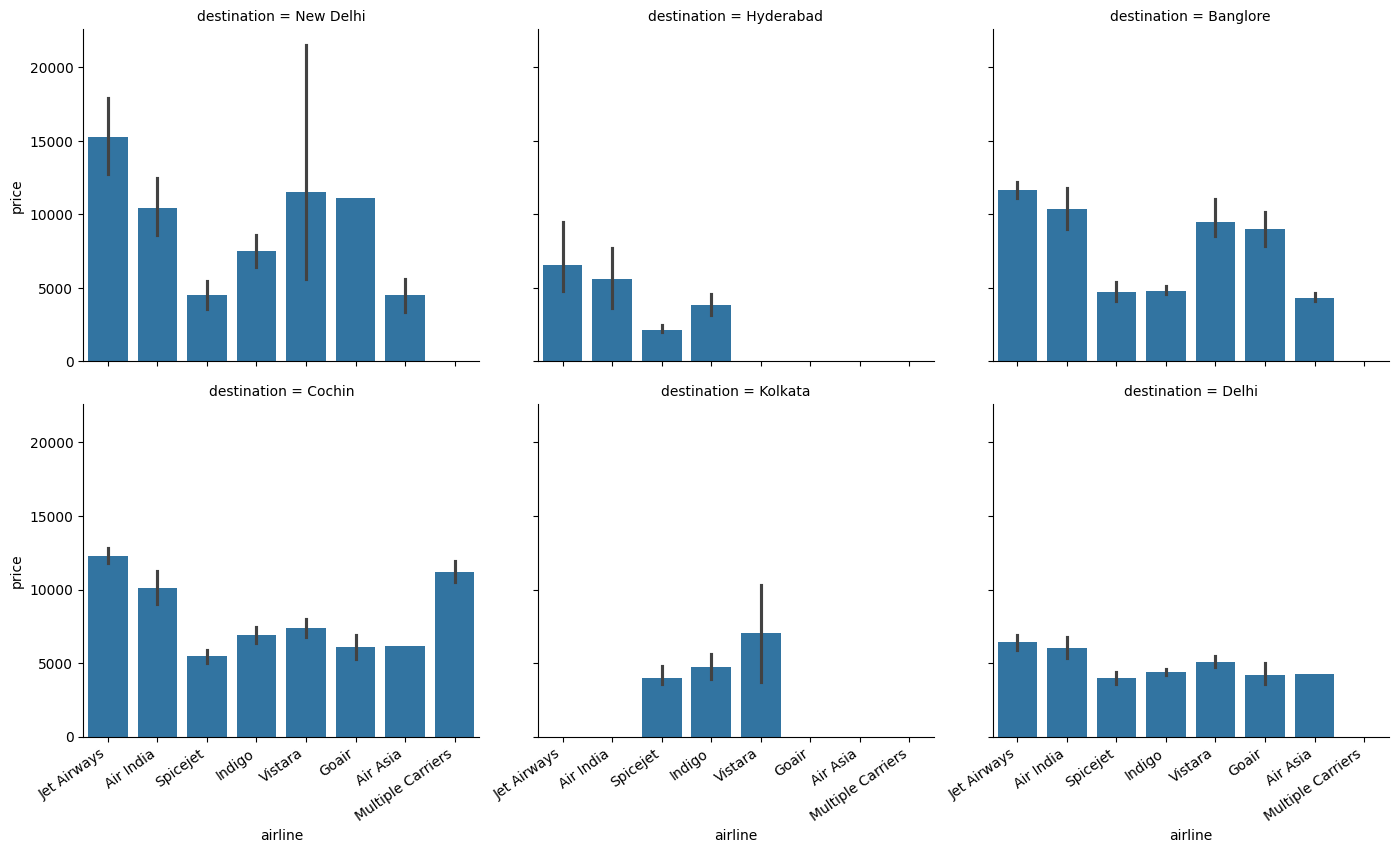

In [50]:
airline_grid = sns.FacetGrid(
    train,
    col = 'destination',
    col_wrap=3,
    sharey=True,
    height = 4,
    aspect=1.2 
)

airline_grid.map(sns.barplot,"airline","price")

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### Date of Journey

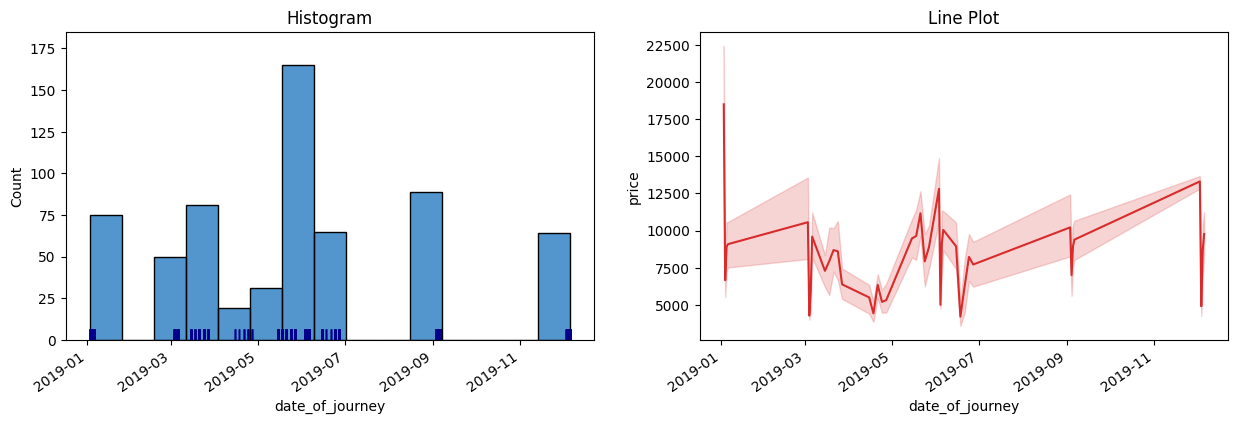

In [213]:
eda_helper_functions.dt_univar_plots(train,var = "date_of_journey",target = "price")

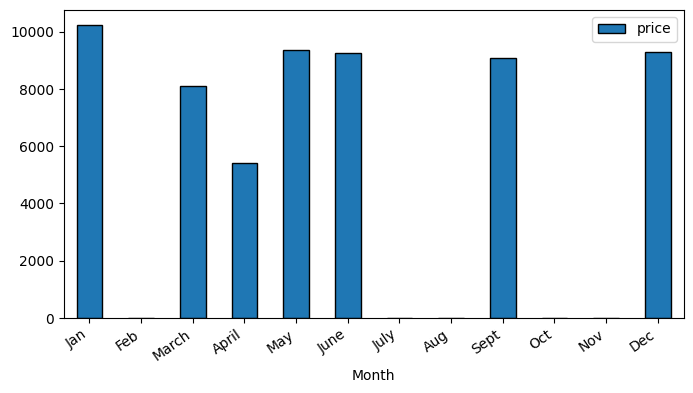

In [216]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))['price'].mean()
    .to_frame()
    .set_axis(["Jan","Feb","March","April","May","June","July","Aug","Sept","Oct","Nov","Dec"],axis=0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar",
        figsize=(8,4),
        edgecolor = "black" 
            )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

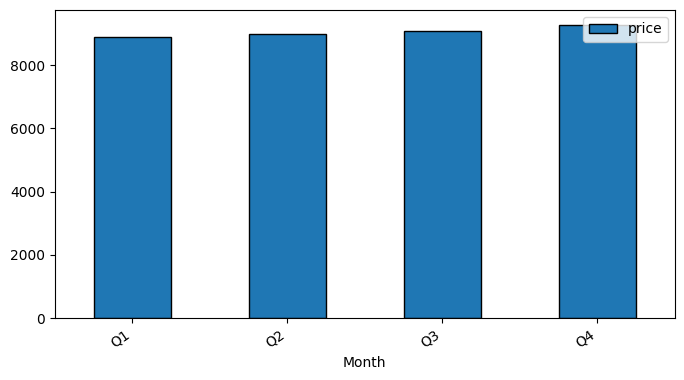

In [218]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="Q"))['price'].mean()
    .to_frame()
    .set_axis(["Q1","Q2","Q3","Q4"],axis=0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar",
        figsize=(8,4),
        edgecolor = "black" 
            )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

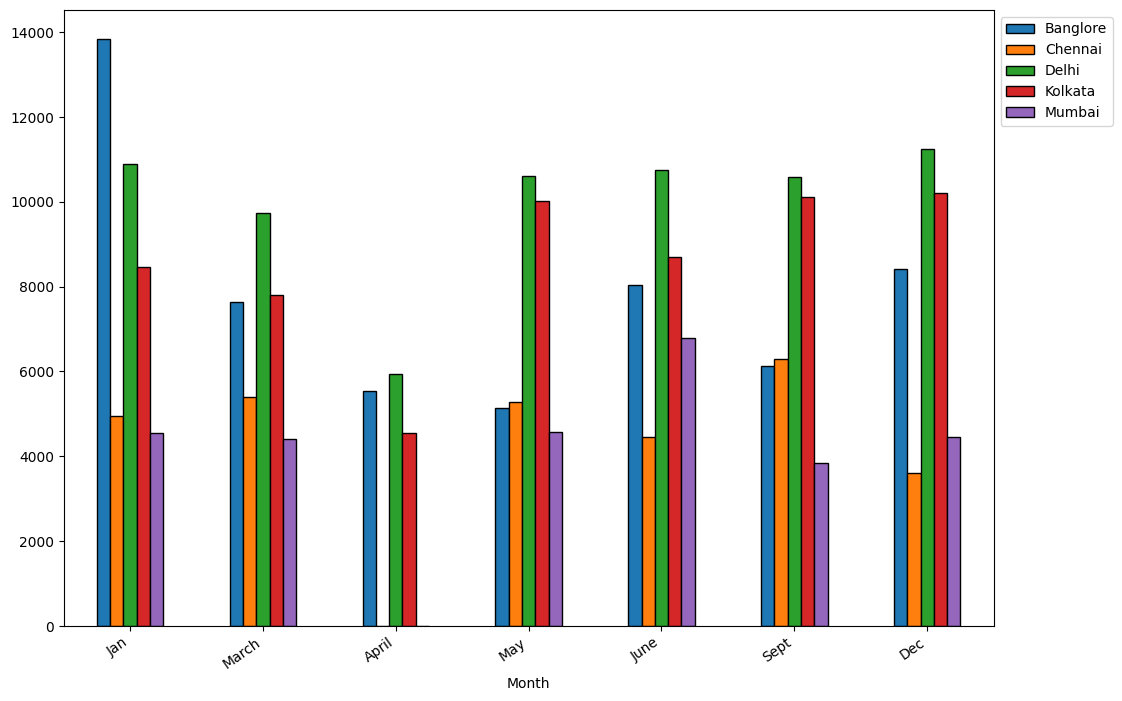

In [222]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])['price'].mean()
    .unstack(fill_value=0) # moves one index of mutiindex dataframe to columns
    .set_axis(["Jan","March","April","May","June","Sept","Dec"],axis=0)
    .rename_axis(index = 'Month')
    .plot(
        kind = "bar",
        figsize=(12,8),
        edgecolor = "black" 
            )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)
ax.legend(
    loc  = 'upper left',
    bbox_to_anchor = (1,1)
)

## Dep_Time

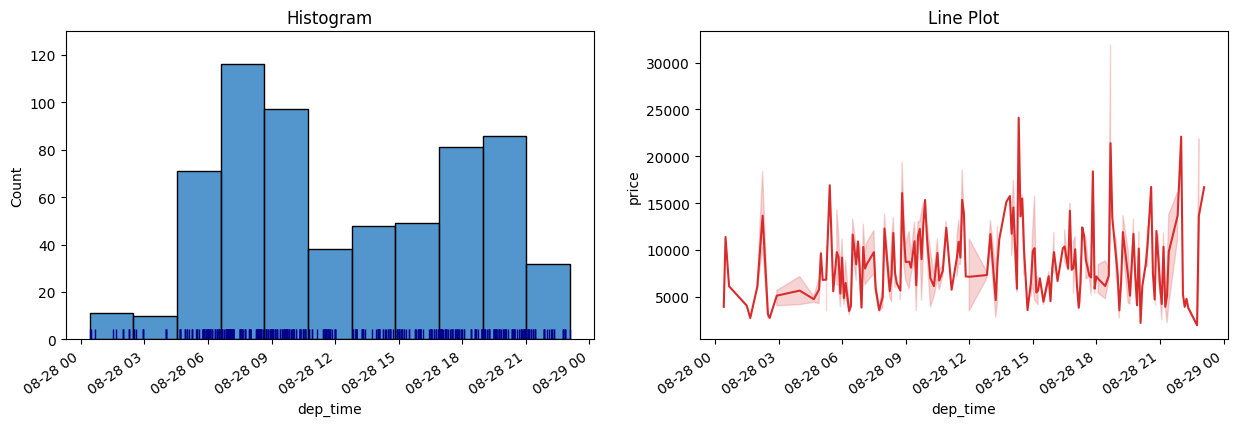

In [223]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

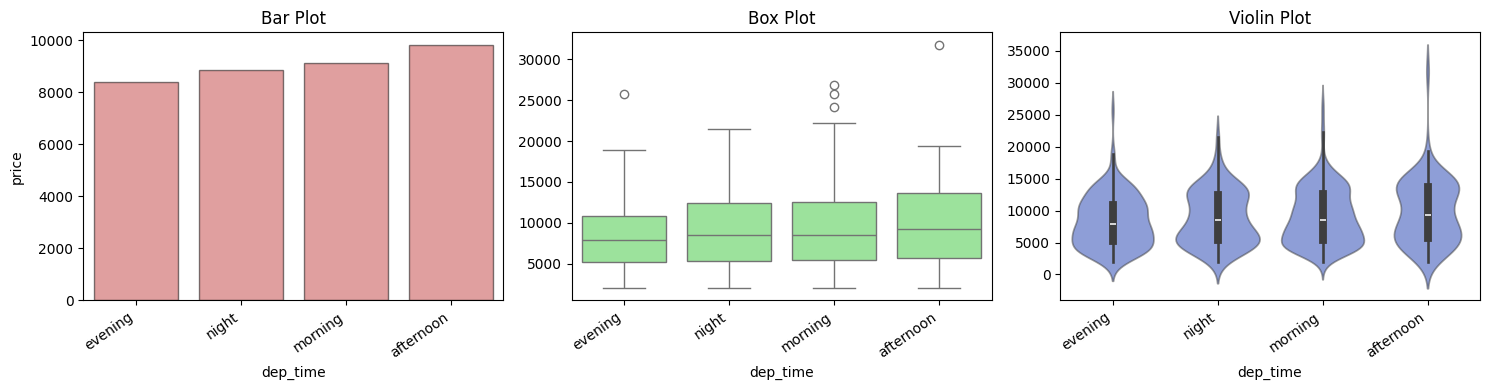

In [225]:
train.assign(
    dep_time = pd.Series(train['dep_time'].dt.hour
                .pipe(lambda ser : np.select([ser.between(4,12,inclusive="left"),
                                            ser.between(12,16,inclusive="left"),
                                            ser.between(16,20,inclusive="left")],
                                            ["morning","afternoon","evening"],
                                            default='night')))
).pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")

## Duration

In [226]:
eda_helper_functions.num_summary(train,'duration')

0       745
1        90
2       520
3       465
4       140
       ... 
635     810
636     795
637    1570
638     925
639     800
Name: duration, Length: 639, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 639 / 639 rows


,value
percentile,
0,75.0
5,90.0
10,140.0
25,170.0
50,480.0
75,902.5
90,1432.0
95,1596.5
99,1793.1


,value
mean,616.737089
trimmed mean (5%),583.492201
trimmed mean (10%),554.571150
median,480.000000


,value
var,248811.711334
std,498.810296
IQR,732.500000
mad,320.000000
coef_variance,0.808789


,value
skewness,0.934376
kurtosis,-0.028564


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 6.743136257650902e-22
Test Statistic       : 0.8789615699304816
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.634042830421777
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


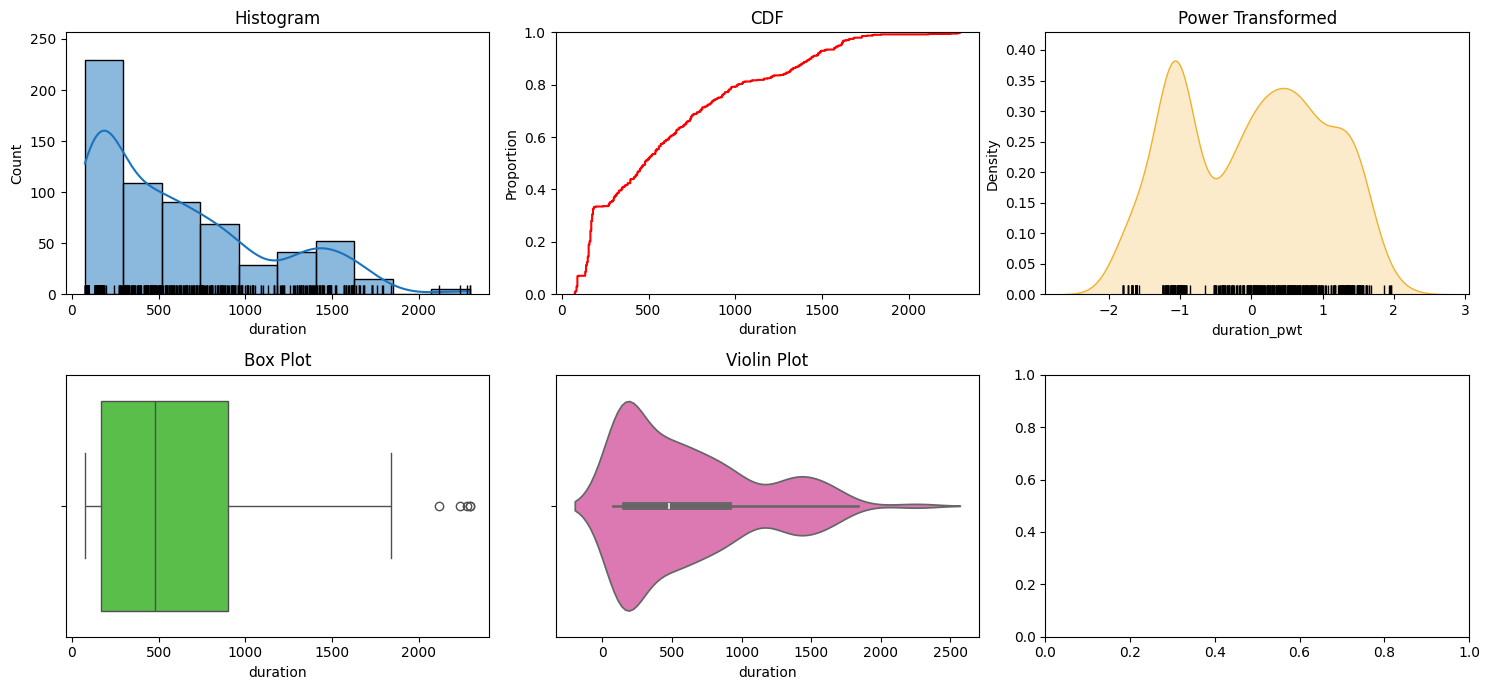

In [227]:
eda_helper_functions.num_univar_plots(train,"duration")

Observation
- Power Transformer tries to make your data more symmetric. 
- Data is right skewed 

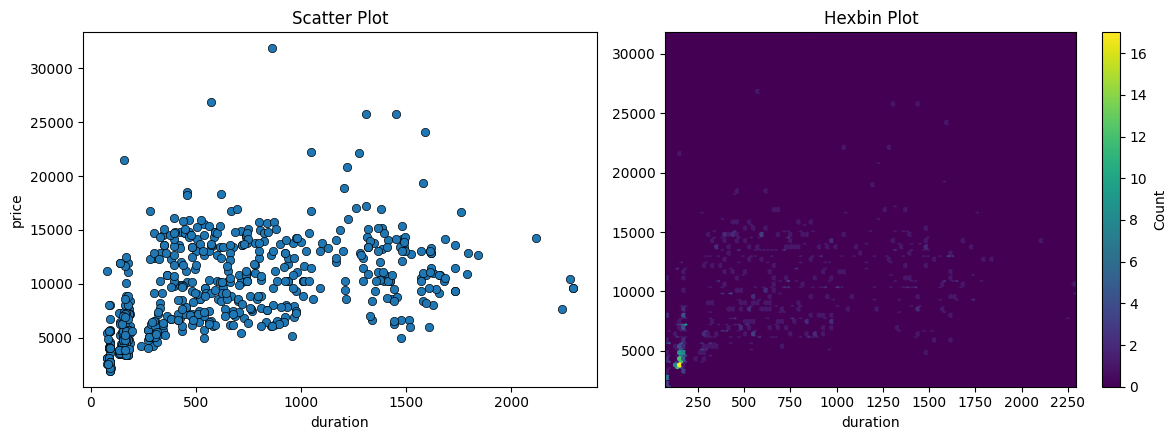

In [228]:
eda_helper_functions.num_bivar_plots(train,"duration","price")

In [229]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5371816235782791
- p-value              : 4.711556257047332e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6857710425879214
- p-value              : 5.902356095403164e-90
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


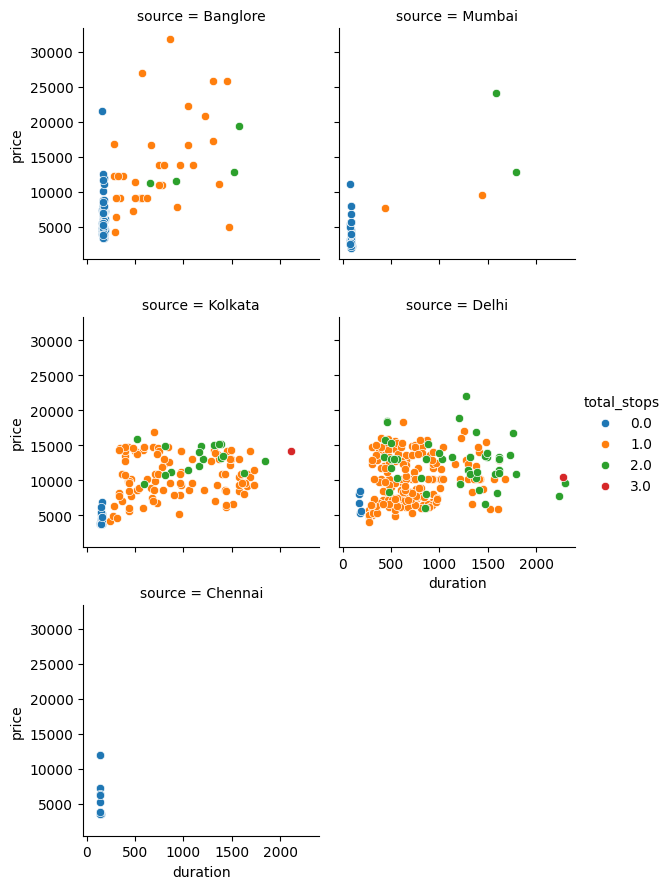

In [239]:
grid  = sns.FacetGrid(
    data  = train,
    hue = "total_stops",
    col = "source",
    sharey=True,
    col_wrap=2
)

grid.map(sns.scatterplot,"duration","price")
grid.add_legend()

In [78]:
print(f"{'Data_Type'}")

Data_Type


In [ ]:
import random
fig,ax = plt.subplots(2,2,figsize = (12,8))
count_data = train['airline'].value_counts()
count_data.to_frame().reset_index()
color = [tuple(np.random.randint(0,256,3)/255) for _ in range(len(count_data))]
barplot = ax[0][0].bar(x = range(len(count_data)),
             height = count_data.values,
             tick_label=count_data.index,
             color=color,
             edgecolor="black",
             alpha=0.7)
ax[0][0].bar_label(
      barplot,
      padding=5,
      color="black"
  )

ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(),rotation = 45,ha = 'right')

In [ ]:
import matplotlib.pylab as plt
def num_cat_bi_plot(data,
                    num_var,
                    cat_var,
                    agg_func = 'mean',
                    figsize = (12,8)):
    data_grouped = (data.groupby(cat_var)
                    .agg(agg_func,numeric_only = True)
                    .loc[:,num_var]
                    .sort_values())
    print(data_grouped)
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.barplot(data_grouped.to_frame(),
                x=data_grouped.index,
                y = data_grouped.values,
                ax = axes[0], # type: ignore
                color = "#d92b2b")
    axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45,ha = "right")
    axes[0].set(
        title="Bar Plot",
        ylabel = num_var,
        xlabel = cat_var
    )
    #plt.show()
    
    sns.boxplot(train,
                y=num_var,
                x = cat_var,
                ax = axes[1], # type: ignore
                color = "green",
                order = data_grouped.index)
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 45,ha = 'right')
    
    sns.violinplot(
        train,
        x = cat_var,
        y = num_var,
        color = 'violet',
        ax = axes[2],
        order = data_grouped.index
    )
    axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 45, ha = "right")
    plt.show()

In [241]:
from ydata_profiling import ProfileReport

In [242]:
profile = ProfileReport(train, title="Profiling Report")

In [243]:
profile.to_file(output_file = 'output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1170.94it/s]


In [212]:
[j['price'].values for i,j in train.groupby("airline")]

[array([6152, 5192, 4409, 6151, 3807, 4384, 4282, 6152, 4107, 4409, 5615,
        4107, 3383, 4384]),
 array([ 8907,  6961,  4943, 13381,  8372,  5176,  3100, 15407, 14960,
         6692,  3100, 12009, 11213, 10991,  3100, 13227, 12723,  6241,
        15170,  6612, 11392,  8792,  7480,  3100,  4651,  8372,  5228,
        13007,  6117,  9653, 11003, 11516, 13465, 19372, 15107,  6961,
         5411,  7452,  7192,  4145, 12854,  2575,  9535,  8052, 11753,
        11570,  4441,  6528,  8851, 12415,  4460,  7174,  4145,  9417,
        10203, 10493,  5462,  8456,  8236, 14960, 10975, 11201, 15187,
         8656, 13437,  7711, 13013, 12778, 11185, 22096, 14109,  8891,
         5510,  8907,  9416, 12526, 13591,  7199, 11633,  4937,  7171,
         9653,  7384,  7893,  6245, 14221,  2575,  8588, 13039, 15894,
         6961,  5228, 10697,  8907]),
 array([10198,  3898,  3419,  3419,  6722,  7831,  4959,  4239,  4239,
         5752,  5281,  3419, 11111,  7031,  7378,  3898]),
 array([ 2754,  3850